# Required packages import

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

# Plot image functions

In [2]:
def plot_1img (img_1, img_1_title, figsize=(10,10), image_1_cmap=None):
    fig, (ax1) = plt.subplots(1,1,figsize=figsize)
    ax1.imshow(img_1, cmap=image_1_cmap)
    ax1.set_title(img_1_title)
    
def plot_2img (img_1, img_1_title, img_2, img_2_title, image_1_cmap=None, image_2_cmap=None, figsize = (20,10)):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=figsize)
    ax1.imshow(img_1, cmap=image_1_cmap)
    ax1.set_title(img_1_title)
    ax2.imshow(img_2, cmap=image_2_cmap)
    ax2.set_title(img_2_title)
    
# Credits to the answer by ImportanceOfBeingErnest on https://stackoverflow.com/questions/41793931/plotting-images-side-by-side-using-matplotlib   
def plot_4img (img_1, img_1_title, img_2, img_2_title, img_3, img_3_title, img_4, img_4_title, image_1_cmap=None, image_2_cmap=None, image_3_cmap=None, image_4_cmap=None,figsize = (20,10)):
    f, axarr = plt.subplots(2,2, figsize=figsize)
    axarr[0,0].imshow(img_1, cmap=image_1_cmap)
    axarr[0,0].set_title(img_1_title)
    axarr[0,1].imshow(img_2, cmap=image_2_cmap)
    axarr[0,1].set_title(img_2_title)
    axarr[1,0].imshow(img_3, cmap=image_3_cmap)
    axarr[1,0].set_title(img_3_title)
    axarr[1,1].imshow(img_4, cmap=image_4_cmap)
    axarr[1,1].set_title(img_4_title)
    
def plot_8img (img_1, img_1_title, img_2, img_2_title, img_3, img_3_title, img_4, img_4_title, img_5, img_5_title, img_6, img_6_title, img_7, img_7_title, img_8, img_8_title, 
               image_1_cmap=None, image_2_cmap=None, image_3_cmap=None, image_4_cmap=None, image_5_cmap=None, image_6_cmap=None, image_7_cmap=None, image_8_cmap=None, figsize = (20,7)):
    f, axarr = plt.subplots(2,4, figsize=figsize)
    axarr[0,0].imshow(img_1, cmap=image_1_cmap)
    axarr[0,0].set_title(img_1_title)
    axarr[0,1].imshow(img_2, cmap=image_2_cmap)
    axarr[0,1].set_title(img_2_title)
    axarr[0,2].imshow(img_3, cmap=image_3_cmap)
    axarr[0,2].set_title(img_3_title)
    axarr[0,3].imshow(img_4, cmap=image_4_cmap)
    axarr[0,3].set_title(img_4_title)
    axarr[1,0].imshow(img_5, cmap=image_5_cmap)
    axarr[1,0].set_title(img_5_title)
    axarr[1,1].imshow(img_6, cmap=image_6_cmap)
    axarr[1,1].set_title(img_6_title)
    axarr[1,2].imshow(img_7, cmap=image_7_cmap)
    axarr[1,2].set_title(img_7_title)
    axarr[1,3].imshow(img_8, cmap=image_8_cmap)
    axarr[1,3].set_title(img_8_title)

# Camera calibration

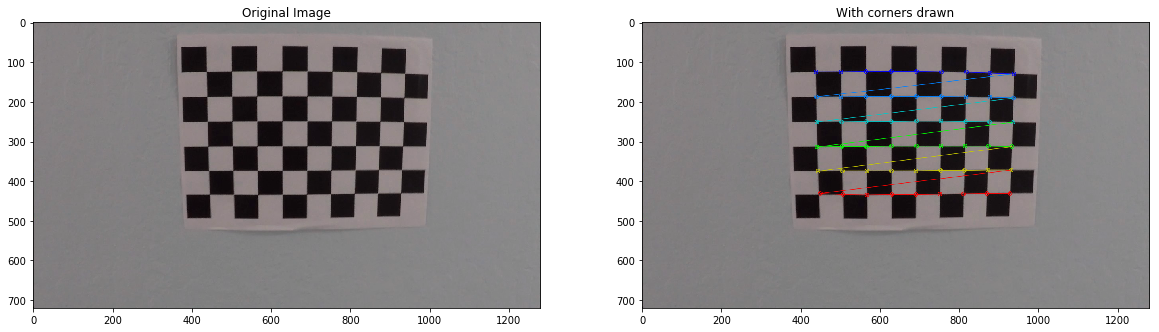

In [32]:
objpoints = []
imgpoints = []

images = glob.glob('./camera_cal/*.jpg')

#number of corners on the chessboard
nx = 9
ny = 6

#define meshgrid 
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

#loop through chessboard images
for image in images:
    # read image and make grayscale copy
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
    #find chessboard corners in gray img
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        cornerimg=img.copy()
        cv2.drawChessboardCorners(cornerimg, (nx, ny), corners, ret)       
        
#plot last processed image and the version with corners drawn.
plot_2img(img, 'Original Image', cornerimg, 'With corners drawn')

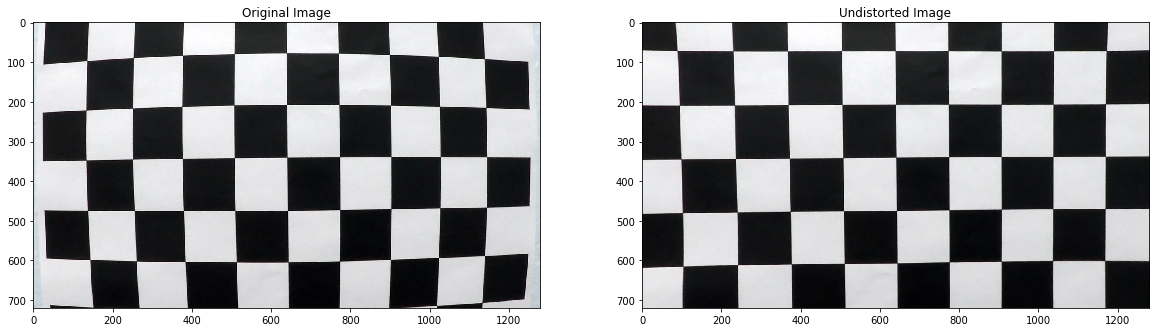

In [4]:
cal_img = cv2.imread('./camera_cal/calibration1.jpg')

def undistort(img, objpoints, imgpoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist


#call undistort image procedure
undistorted = undistort(cal_img, objpoints, imgpoints)

plot_2img(cal_img, 'Original Image', undistorted, 'Undistorted Image')

# Color Space, Filters & Sobel operator

In [5]:
#Pick first image and transform to rgb color space
test1 = cv2.imread('test_images/test2.jpg')
color_test1 = cv2.cvtColor (test1, cv2.COLOR_BGR2RGB)

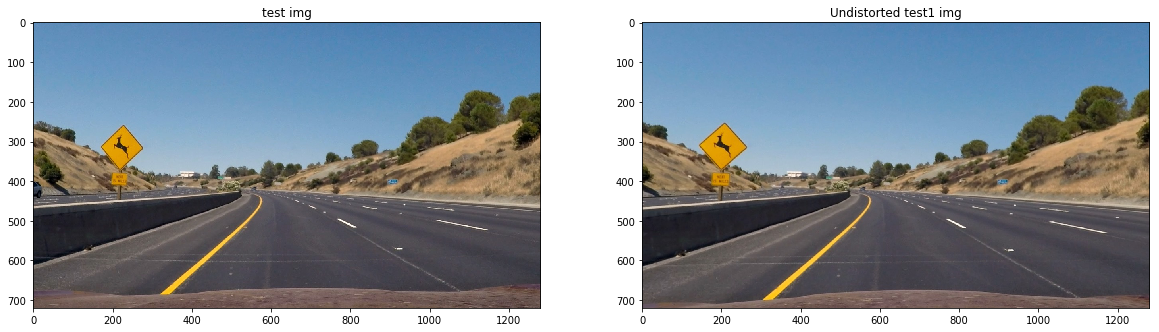

In [6]:
#Undistort image and show next to original
undistorted = undistort(color_test1, objpoints, imgpoints)
plot_2img(color_test1, "test img", undistorted, "Undistorted test1 img")

### Conversion to HLS color space and plotting all channels

In [7]:
#The course so far has taught that translation to HLS color space might prove wise to see if certain channels better distinguish the lane markings from the rest of the image.
def convert2HLS(image):
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    return h_channel, l_channel, s_channel

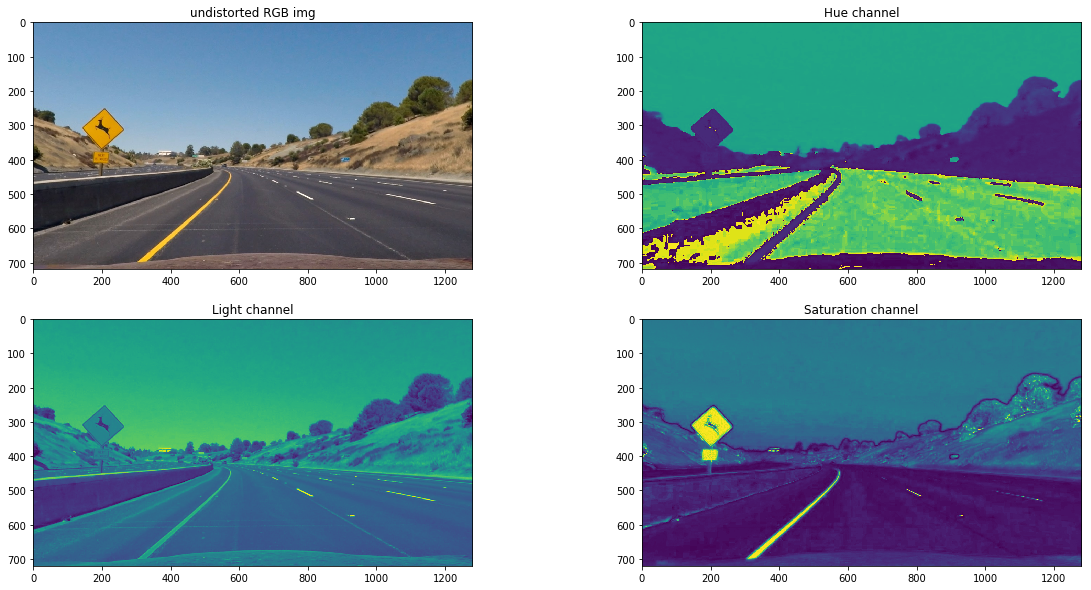

In [8]:
#extract channels from conversion function and plot channels
h_channel, l_channel, s_channel = convert2HLS (undistorted)
plot_4img(undistorted, "undistorted RGB img", h_channel, "Hue channel", l_channel, "Light channel", s_channel, "Saturation channel")

Clearly, the saturation channel provides the best way to distinguish the lane markings on the image above. Saturation should generally be independent of the lighting, therefore this channel is suitable for lane detection in a variety of lighting conditions. Let's threshold values in this channel to mask all but the lane markings in this image.

In [9]:
#function to pick and return the saturation channel for an RGB image (converted to HLS using call to HLS conversion function)
def pick_saturation(image):
    s_channel=convert2HLS(image)[2]
    return s_channel

In [10]:
#Apply threshold to saturation channel
def thresh_sat(img, sat_thresh):
    s_channel = pick_saturation(img)
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= sat_thresh[0]) & (s_channel <= sat_thresh[1])] = 1
    return s_binary

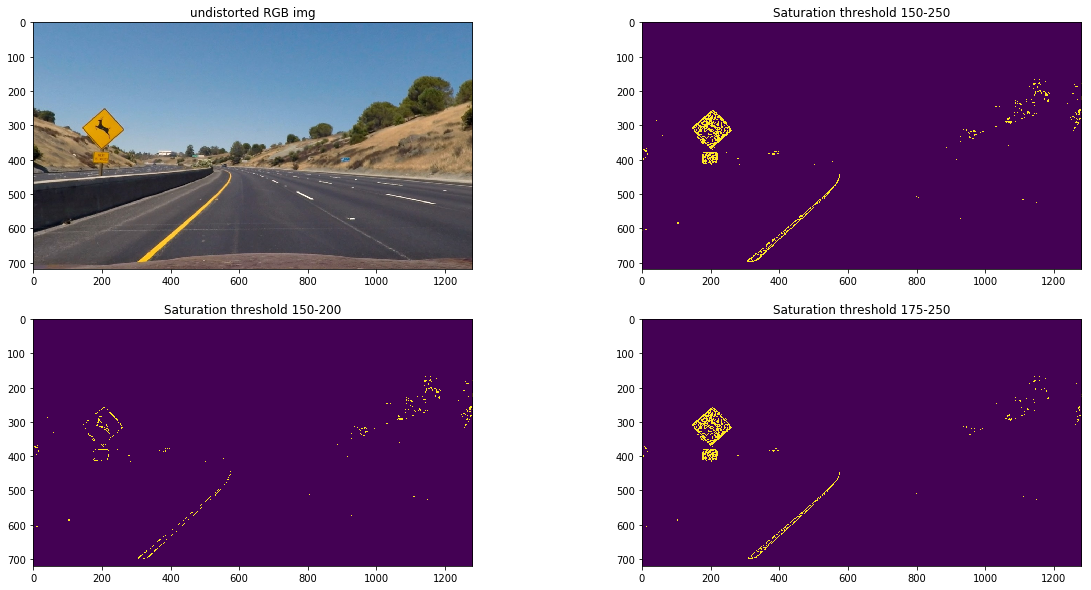

In [11]:
#Plot images using a variety of thresholds
plot_4img(undistorted, "undistorted RGB img", thresh_sat(undistorted, sat_thresh=(150,250)), "Saturation threshold 150-250", 
          thresh_sat(undistorted, sat_thresh=(150,200)), "Saturation threshold 150-200", 
          thresh_sat(undistorted, sat_thresh=(175,250)), "Saturation threshold 175-250")

Upping the lower threshold does not result in a large loss of lane pixels, but does reduce the noise within the image. 
The upper limit must clearly be high to include lane pixels. We pick the 175-250 thresholds as this image roughly indicates the lane lines with a low amount off noise.

## Apply sobel operator to black & white image

In [12]:
#function to return black&white image from rgb input img
def gray (img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray

In [13]:
#Function to apply the sobel operator in x or y orientation with adjustable thresholds (default 0, 255)
def apply_sobel(img, sobel_kernel=5, orient='x', mag_thresh=(0,255)):
    if orient == 'x':
        sobel = cv2.Sobel(img, cv2.CV_64F, 1,0)
    else:
        sobel = cv2.Sobel(img, cv2.CV_64F, 0,1)
    abs_sobel = np.absolute(sobel)
    scaled_sobel= np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_output=np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel>=mag_thresh[0]) & (scaled_sobel<=mag_thresh[1])]=1
    return binary_output

### Plot images with x-sobel applied

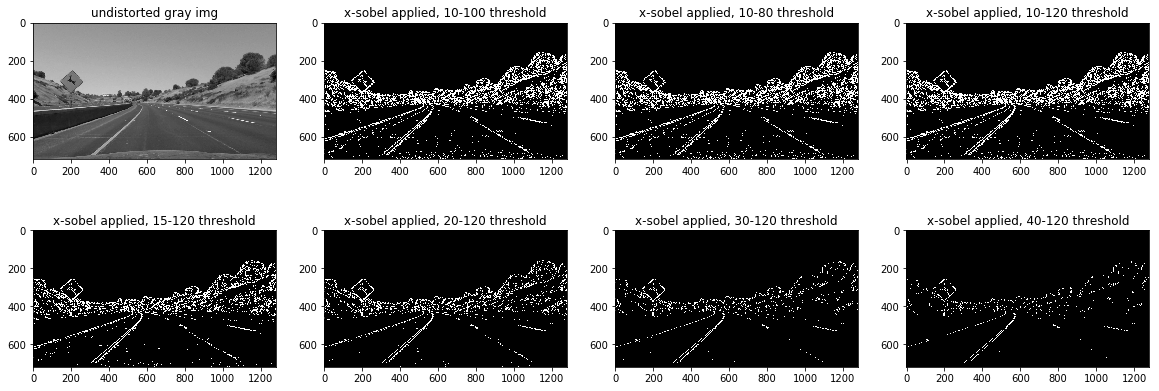

In [14]:
plot_8img(gray(undistorted), "undistorted gray img", apply_sobel(gray(undistorted), mag_thresh = (10, 100)), "x-sobel applied, 10-100 threshold", 
          apply_sobel(gray(undistorted), mag_thresh = (10, 80)), "x-sobel applied, 10-80 threshold", 
          apply_sobel(gray(undistorted), mag_thresh = (10, 120)), "x-sobel applied, 10-120 threshold", 
          apply_sobel(gray(undistorted), mag_thresh = (15, 120)), "x-sobel applied, 15-120 threshold", 
          apply_sobel(gray(undistorted), mag_thresh = (20, 120)), "x-sobel applied, 20-120 threshold", 
          apply_sobel(gray(undistorted), mag_thresh = (30, 120)), "x-sobel applied, 30-120 threshold", 
          apply_sobel(gray(undistorted), mag_thresh = (40, 120)), "x-sobel applied, 40-120 threshold", 
          image_1_cmap = 'gray', image_2_cmap='gray', image_3_cmap='gray' ,image_4_cmap='gray', image_5_cmap='gray', 
          image_6_cmap='gray', image_7_cmap='gray', image_8_cmap='gray')

### Plot images with y-sobel applied

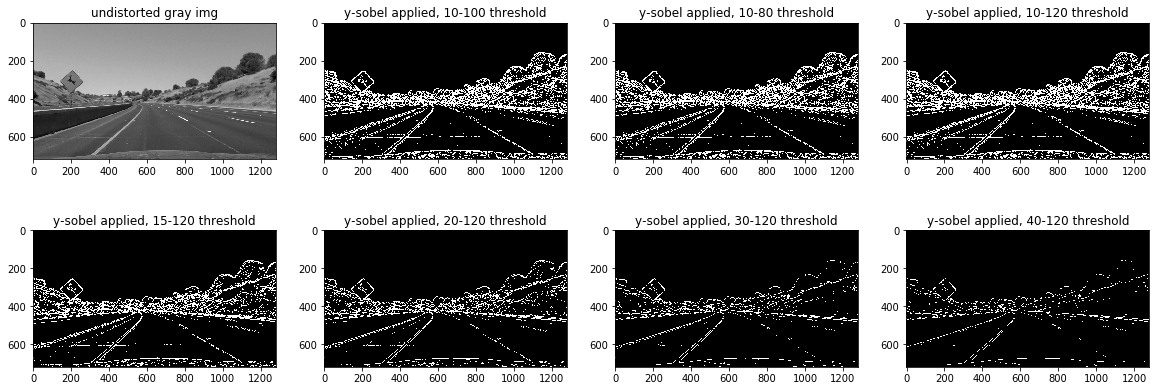

In [15]:
plot_8img(gray(undistorted), "undistorted gray img", apply_sobel(gray(undistorted), orient='y', mag_thresh = (10, 100)), "y-sobel applied, 10-100 threshold", 
          apply_sobel(gray(undistorted), orient='y', mag_thresh = (10, 80)), "y-sobel applied, 10-80 threshold", 
          apply_sobel(gray(undistorted), orient='y', mag_thresh = (10, 120)), "y-sobel applied, 10-120 threshold", 
          apply_sobel(gray(undistorted), orient='y', mag_thresh = (15, 120)), "y-sobel applied, 15-120 threshold", 
          apply_sobel(gray(undistorted), orient='y', mag_thresh = (20, 120)), "y-sobel applied, 20-120 threshold", 
          apply_sobel(gray(undistorted), orient='y', mag_thresh = (30, 120)), "y-sobel applied, 30-120 threshold", 
          apply_sobel(gray(undistorted), orient='y', mag_thresh = (40, 120)), "y-sobel applied, 40-120 threshold", 
          image_1_cmap = 'gray', image_2_cmap='gray', image_3_cmap='gray' ,image_4_cmap='gray', image_5_cmap='gray', 
          image_6_cmap='gray', image_7_cmap='gray', image_8_cmap='gray')

The sobel in the horizontal direction show the lane markings more clearly as opposed to the y-directional sobel operator applied to the image. The lower threshold is very sensitive, when set to 10, a little too much noise is included in the image. Too high and we lose valuable lane marking pixels. 15 seems to be a sensible lower threshold. The upper threshold is set to 120.

## Combine saturation channel threshold and Sobel operator mask

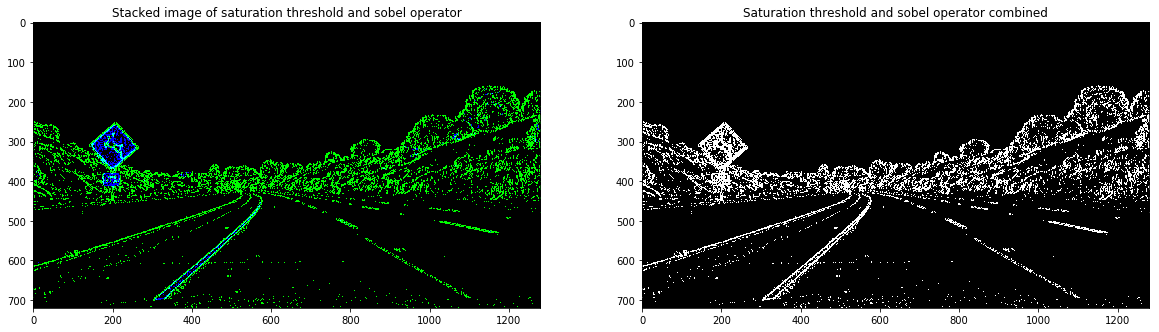

In [16]:
# Make function for combined binary
def combine_binary(undistorted):
    #Stack channels to view contributions by each of the filter/masks. Using RGB channels, we fill the green pixels with the sobel mask and the blue pixels with the saturation threshold
    s_binary = thresh_sat(undistorted, sat_thresh=(175,250))
    sobel_binary = apply_sobel(gray(undistorted), mag_thresh=(15,120))
    color_binary = np.dstack(( np.zeros_like(sobel_binary), sobel_binary, s_binary)) * 255
    
    # Combine the two binary thresholds
    combined_binary = np.zeros_like(sobel_binary)
    combined_binary[(s_binary == 1) | (sobel_binary == 1)] = 1
    return color_binary, combined_binary
    
# Plot both images
plot_2img(combine_binary(undistorted)[0], "Stacked image of saturation threshold and sobel operator", combine_binary(undistorted)[1], "Saturation threshold and sobel operator combined", image_2_cmap='gray')

Now, with combined_binary, we have a image which shows the lane markings cleary. Let's apply a mask to the outer region so that we can analyse the lane markings more easily.

# Transform

let's transform the image into a top down view. First we define source and destination points, eyeballing the source points using the masked image.

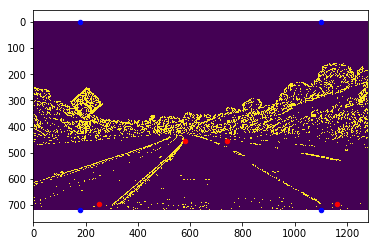

In [17]:
#masked_img = region_of_interest(combined_binary, combined_binary.shape)
masked_img = combine_binary(undistorted)[1]
plt.imshow(masked_img)
plt.scatter(x=[250, 580, 740, 1160], y=[695, 455, 455, 695], c='r', s=20)
plt.scatter(x=[180, 180, 1100, 1100], y=[0, 720, 0, 720], c='b', s=20)

src = np.float32([[580, 455], [740, 455], [1160, 695], [250, 695]])
dst = np.float32([[180, 0], [masked_img.shape[1]-180,0], [masked_img.shape[1]-180, masked_img.shape[0]], [180, masked_img.shape[0]]])

In [18]:
def warpimage (img, src, dst):
        M = cv2.getPerspectiveTransform(src, dst)
        Minv = cv2.getPerspectiveTransform(dst, src)
        warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]), flags=cv2.INTER_LINEAR)
        return warped, M, Minv

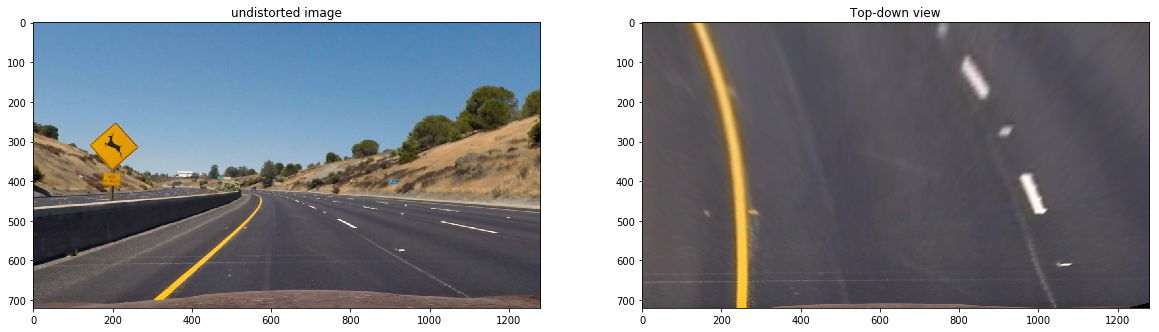

In [19]:
transformed_img = warpimage(undistorted, src, dst)
plot_2img(undistorted, "undistorted image", transformed_img[0], "Top-down view")

Apply the transformation to the masked image and show these

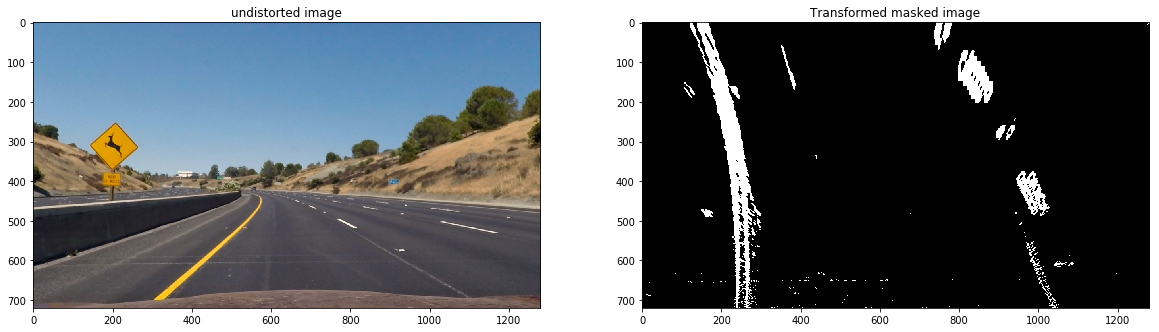

In [20]:
transformed_img = warpimage(masked_img, src, dst)
plot_2img(undistorted, "undistorted image", transformed_img[0], "Transformed masked image", image_2_cmap='gray')

## Histogram
Using the histogram, we try to find the starting points on the X-axis of the lane lines

In [21]:
def hist(img):
    bottom_half = img[(img.shape[0])//2:,:]
    #sum pixel values vertically
    histogram = np.sum(bottom_half, axis=0)
    return histogram

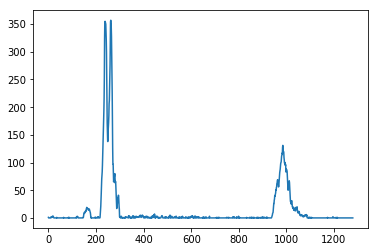

In [22]:
#plot histogram
plt.plot(hist(transformed_img[0]))

## Find lane pixels
Using the histogram and sliding windows method, we find the starting points of the lines and use sliding windows to detect the direction of the lines. Then we fit a polygon to these point to determine the position of the lane lines.

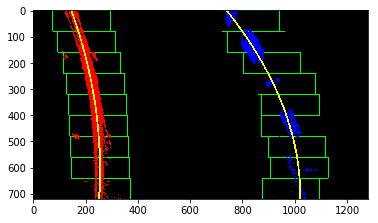

In [23]:
#Based on codesample from quiz lesson 8
def find_lane_pixels(img, nwindows=9, margin=110, minpix=100):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(img[img.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((img, img, img))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(img.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = img.shape[0] - (window+1)*window_height
        win_y_high = img.shape[0] - window*window_height
        ### TO-DO: Find the four below boundaries of the window ###
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        ### TO-DO: Identify the nonzero pixels in x and y within the window ###
        good_left_inds = ((nonzeroy>=win_y_low) & (nonzeroy<win_y_high) & (nonzerox >=win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy>=win_y_low) & (nonzeroy<win_y_high) & (nonzerox >=win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        ### TO-DO: If you found > minpix pixels, recenter next window ###
        ### (`right` or `leftx_current`) on their mean position ###
        if len(good_left_inds)>minpix:
            leftx_current=np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds)>minpix:
                    rightx_current=np.int(np.mean(nonzerox[good_right_inds]))
    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    ym_per_pixel = 30/720 
    xm_per_pixel = 3.7/700 
    
    left_fit_m = np.polyfit(lefty*ym_per_pixel, leftx*xm_per_pixel, 2)
    right_fit_m = np.polyfit(righty*ym_per_pixel, rightx*xm_per_pixel, 2)
    
    radius, offset = curvature(left_fit_m, right_fit_m, ym_per_pixel, xm_per_pixel)

    # Highlight lane pixels and draw fit polynomials
    lane_pixel_img = np.dstack((img, img, img))*255
    lane_pixel_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    lane_pixel_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    return leftx, lefty, rightx, righty, radius, offset, out_img

#Draw polynomial
def draw_polynomial(img, fit):
    y = np.linspace(0, img.shape[0]-1, img.shape[0])
    x = fit[0]*y**2 + fit[1]*y + fit[2]
    pts = np.array([np.transpose(np.vstack([x, y]))])
    cv2.polylines(img, np.int_(pts), isClosed=False, color=(255, 255,0), thickness=5)

def fit_polynomial(img):
   
    # Find our lane pixels first
    leftx, lefty, rightx, righty, radius, offset, out_img = find_lane_pixels(img)

    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    # Generate x and y values for plotting
    ploty = np.linspace(0, img.shape[0]-1, img.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]
    draw_polynomial(out_img, left_fit)
    draw_polynomial(out_img, right_fit)
    
    return ploty, left_fit, right_fit, radius, offset, out_img

def curvature(left_fit, right_fit, ym_per_pixel, xm_per_pixel):
    left_curverad =  ((1 + (2*left_fit[0]*720*ym_per_pixel + left_fit[1])**2)**(3/2))/np.abs(2*left_fit[0])
    right_curverad =  ((1 + (2*right_fit[0]*720*ym_per_pixel + right_fit[1])**2)**(3/2))/np.abs(2*right_fit[0])
    
    left_lane = left_fit[0]*(720*ym_per_pixel)**2 + left_fit[1]*720*ym_per_pixel + left_fit[2]
    right_lane = right_fit[0]*(720*ym_per_pixel)**2 + right_fit[1]*720*ym_per_pixel + right_fit[2]
    
    radius = np.mean([left_curverad, right_curverad])
    offset = [920*xm_per_pixel - np.mean([left_lane, right_lane]), right_lane-left_lane]
    return radius, offset


#out_img = find_lane_pixels(transformed_img[0])
#plt.imshow(out_img[6])
out_img = fit_polynomial(transformed_img[0])
plt.imshow(out_img[5])

## Draw lane lines
Function to draw the lane lines onto the original image

In [24]:
def draw(original_img, img, left_fit, right_fit, Minv):
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(img).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    ploty = np.linspace(0, img.shape[0]-1, img.shape[0])
    leftx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    rightx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([leftx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([rightx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image using the inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (img.shape[1], img.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(original_img, 1, newwarp, 0.3, 0)
    return result

#Show curvature and offset on the image (used different function for complete blend video frame)
def show_curvature(result_img, radius, offset):   
    
    cv2.putText(result_img, 'Radius of Curvature: {} m'.format(round(radius)), (15, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 3)
    cv2.putText(result_img, 'Offset: {} m'.format(round(offset[0], 3)), (15, 90), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 3)
    
    return result_img

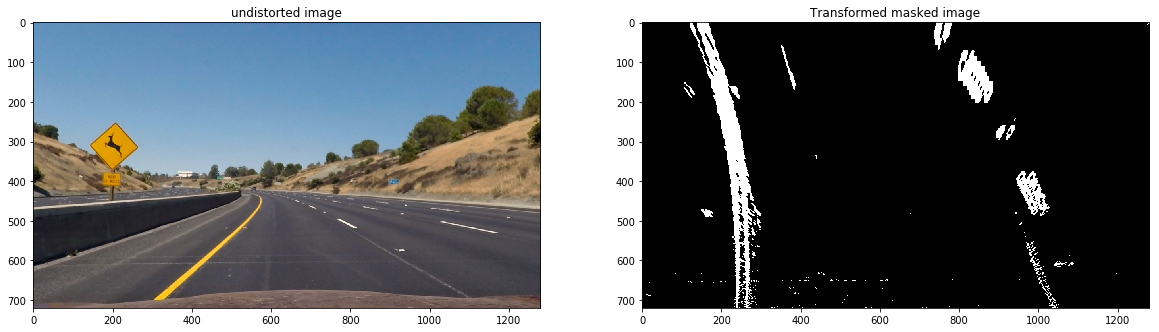

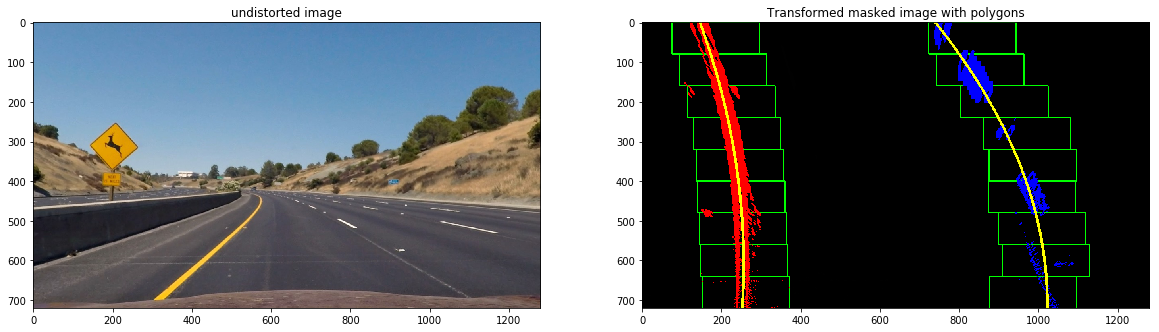

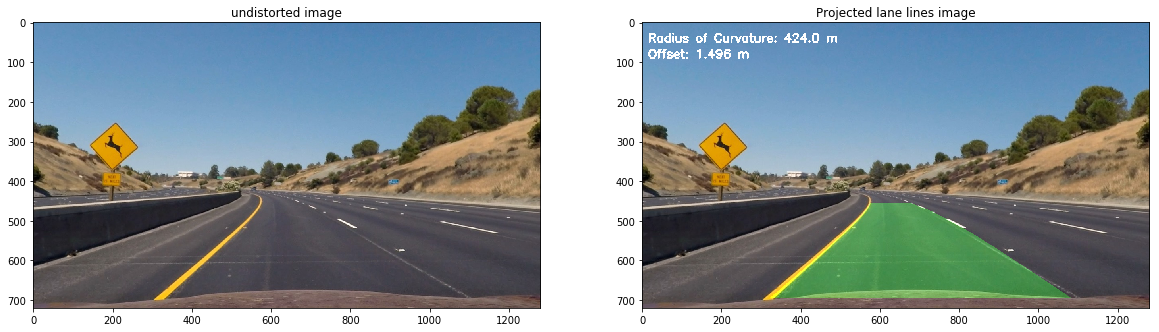

In [25]:
# Detect lane pixels and fit to find the lane boundary.
ploty, left_fit, right_fit, radius, offset, polyfit_img = fit_polynomial(transformed_img[0])

# Warp the detected lane boundaries back onto the original image.
projected_lanes_img = draw(np.copy(undistorted), transformed_img[0], left_fit, right_fit, transformed_img[2])

# Calculate radius and offset
out_img = show_curvature(projected_lanes_img, radius, offset)

plot_2img(undistorted, "undistorted image", transformed_img[0], "Transformed masked image", image_2_cmap='gray')
plot_2img(undistorted, "undistorted image", polyfit_img, "Transformed masked image with polygons", image_2_cmap='gray')
plot_2img(undistorted, "undistorted image", out_img, "Projected lane lines image", image_2_cmap='gray')

## Pipeline for lane detection on single image (snapshot from project video)

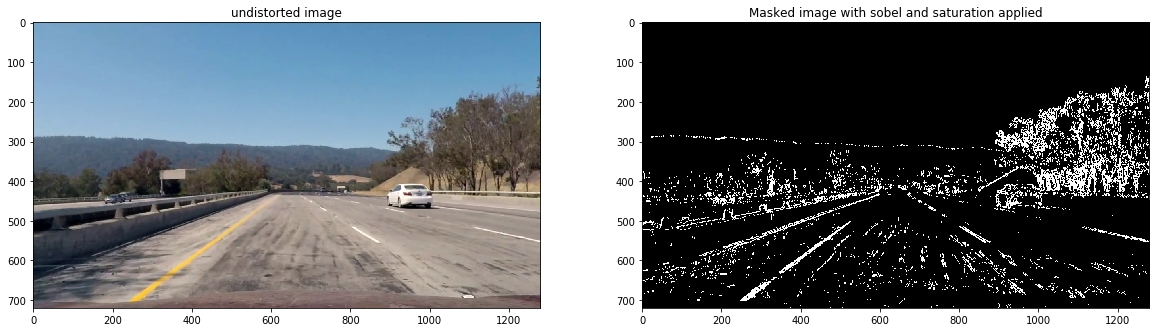

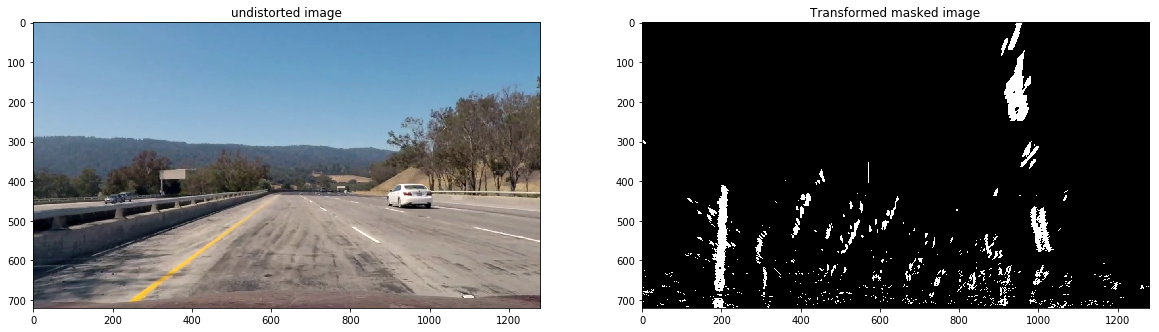

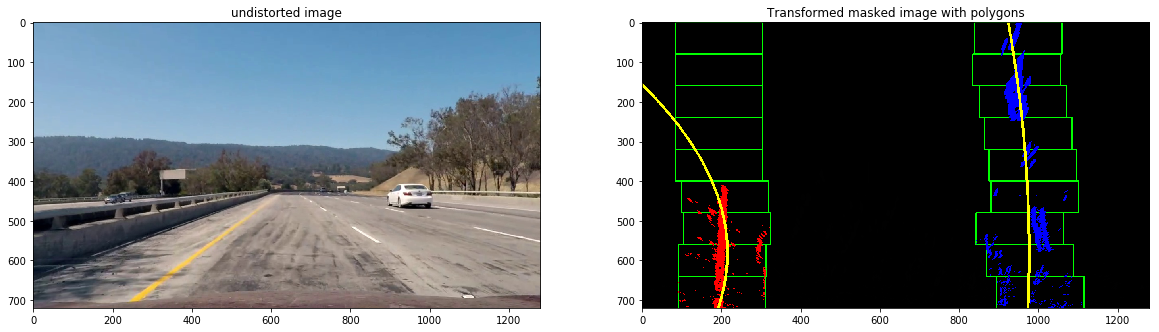

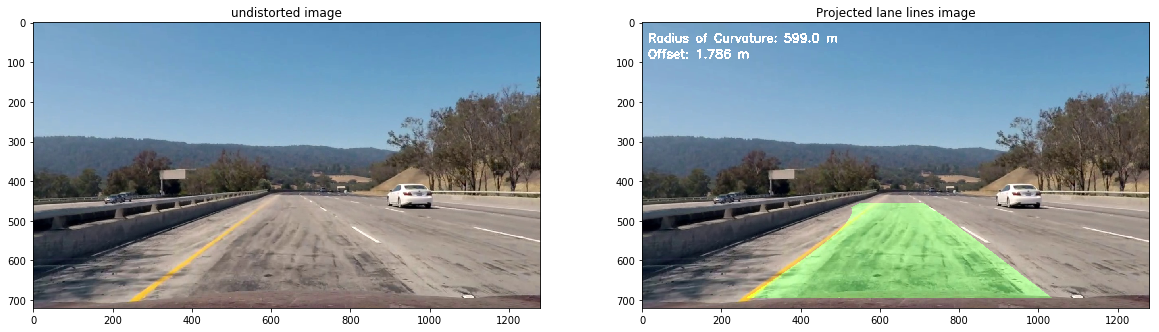

In [26]:
# Get image
test3 = cv2.imread('camimgs/frame556.jpg')

# Convert image to RGB colorspace
color_test3 = cv2.cvtColor (test3, cv2.COLOR_BGR2RGB)

# Undistort image
undistorted_t3 = undistort(color_test3, objpoints, imgpoints)

combined_binary_t3 = combine_binary(undistorted_t3)

plot_2img(undistorted_t3, "undistorted image", combined_binary_t3[1], "Masked image with sobel and saturation applied", image_2_cmap='gray')

# Transform image using source and destinations points (hardcoded)
transformed_img_t3 = warpimage(combined_binary_t3[1], src, dst)

# Detect lane pixels and fit to find the lane boundary.
ploty, left_fit, right_fit, radius, offset, polyfit_img_t3 = fit_polynomial(transformed_img_t3[0])

# Warp the detected lane boundaries back onto the original image.
projected_lanes_img_t3 = draw(np.copy(undistorted_t3), transformed_img_t3[0], left_fit, right_fit, transformed_img_t3[2])

# Calculate radius and offset
out_img = show_curvature(projected_lanes_img_t3, radius, offset)

plot_2img(undistorted_t3, "undistorted image", transformed_img_t3[0], "Transformed masked image", image_2_cmap='gray')
plot_2img(undistorted_t3, "undistorted image", polyfit_img_t3, "Transformed masked image with polygons", image_2_cmap='gray')
plot_2img(undistorted_t3, "undistorted image", out_img, "Projected lane lines image", image_2_cmap='gray')

## Video pipeline

In [27]:
#Based on the work of github user, udacity user "ndrplz" who blends the intermediary steps in the output frames using this function. See also https://github.com/ndrplz/self-driving-car/blob/master/project_4_advanced_lane_finding/main.py
def prepare_out_blend_frame(projected_curvature_img, combined_binary_img, combined_binary_warped, projected_lanes_img, radius, offset, frameidx):

    #Used sample function from user "ndrplz" to generate frame with combined thumbnails of intermediary steps. Useful for evaluating sources of errors during detection.
    h = projected_curvature_img.shape[0]
    w = projected_curvature_img.shape[1]

    thumb_ratio = 0.15
    thumb_h, thumb_w = int(thumb_ratio * h), int(thumb_ratio * w)

    off_x, off_y = 15, 15

    # add a gray rectangle to highlight the upper area
    mask = projected_curvature_img.copy()
    mask = cv2.rectangle(mask, pt1=(0, 0), pt2=(w, thumb_h+off_y), color=(0, 0, 0), thickness=cv2.FILLED)
    projected_curvature_img = cv2.addWeighted(src1=mask, alpha=0.2, src2=projected_curvature_img, beta=0.8, gamma=0)

    # thumbnail of warped binary image with plotted polygons in top right
    thumb_img_fit = cv2.resize(projected_lanes_img, dsize=(thumb_w, thumb_h))
    projected_curvature_img[off_y:thumb_h+off_y, w-(off_x+thumb_w):w-off_x, :] = thumb_img_fit

    # thumbnail of warped binary image left to warped binary image with plotted polygons
    thumb_warped = cv2.resize(combined_binary_warped, dsize=(thumb_w, thumb_h))
    thumb_warped = np.dstack([thumb_warped, thumb_warped, thumb_warped]) * 255
    projected_curvature_img[off_y:thumb_h+off_y, w-2*(off_x+thumb_w):w-(2*off_x+thumb_w), :] = thumb_warped

    # thumbnail of combined binary image left to warped image
    thumb_binary = cv2.resize(combined_binary_img, dsize=(thumb_w, thumb_h))
    thumb_binary = np.dstack([thumb_binary, thumb_binary, thumb_binary]) * 255
    projected_curvature_img[off_y:thumb_h+off_y, w-3*(off_x+thumb_w):w-(3*off_x+2*thumb_w), :] = thumb_binary
    
    # use cv2 text to display radius, offset from center and frame index
    cv2.putText(projected_curvature_img, 'Radius of Curvature: {} m'.format(round(radius)), (off_x, off_y*2), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 3)
    cv2.putText(projected_curvature_img, 'Offset: {} m'.format(round(offset[0], 3)), (off_x, off_y*4), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 3)
    cv2.putText(projected_curvature_img, 'Frame index: {}'.format(frameidx), (off_x, off_y*6), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 3)

    return projected_curvature_img

In [28]:
from IPython.display import HTML
from moviepy.editor import VideoFileClip

class PipelineVideo(object):
    def __init__(self):
        self.frame_ind = 0
        self.left_fit = None
        self.right_fit = None
        self.radius = None
        self.offset = None
        self.frames = {}
    
    def update_radius_delta(self, radius):
        if (self.frame_ind == 0) | (self.radius is None):
            return 0
        else:
            return abs((radius-self.radius)/self.radius)
        
    def update_offset_delta(self, offset):
        if (self.frame_ind == 0) | (self.offset is None):
            return 0
        else:
            offset[0]
            return abs((offset[0]-self.offset[0])/self.offset[0])

In [29]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)
#Used image pipeline built by Markmisener as basis for this code
def image_pipeline(img, pipeline):
    
    #make copy of img 
    img_copy = np.copy(img)
    
    # Undistort image copy
    undistorted_image = cv2.undistort(img_copy, mtx, dist, None, mtx)

    # Use color transforms, gradients, etc., to create a thresholded binary image.
    binary_output = combine_binary(undistorted_image)
    combined_binary_img = binary_output[1]
        
    # Narrow the image to a region of interest
    
    # Apply a perspective transform to rectify binary image ("birds-eye view").
    src = np.float32([[580, 455], [740, 455], [1160, 695], [250, 695]])
    dst = np.float32([[180, 0], [masked_img.shape[1]-180,0], [masked_img.shape[1]-180, masked_img.shape[0]], [180, masked_img.shape[0]]])
    
    combined_binary_warped, M, Minv = warpimage(combined_binary_img, src, dst)

    
    # Detect lane pixels and fit to find the lane boundary.
    ploty, left_fit, right_fit, radius, offset, lane_img = fit_polynomial(combined_binary_warped)
    
    pipeline.frames[pipeline.frame_ind] = {
        'left_fit': left_fit,
        'right_fit': right_fit,
        'radius': radius,
        'radius_delta': pipeline.update_radius_delta(radius),
        'offset': offset,
        'offset_delta': pipeline.update_offset_delta(offset),
        'updated': True
    }

    if pipeline.frame_ind == 0:
        pipeline.offset = offset
        pipeline.radius = radius
        
    # if the changes from the last frame are too great, use the fits from the previous frame
    if ((abs((offset[0]-pipeline.offset[0])) > 0.2) | \
       ((pipeline.radius < 2000) & (abs((radius-pipeline.radius)/pipeline.radius) > 35))) & \
       (pipeline.frame_ind > 0):
        pipeline.frames[pipeline.frame_ind]['updated'] = False
        left_fit = pipeline.left_fit
        right_fit = pipeline.right_fit
        radius = pipeline.radius
        offset = pipeline.offset

    # Warp the detected lane boundaries back onto the original image.
    projected_lanes_img = draw(img_copy, combined_binary_warped, left_fit, right_fit, Minv)

    # Blend projected lane lines image with thumbs and radius+offset text
    frameidx = pipeline.frame_ind
    out_img = prepare_out_blend_frame(projected_lanes_img, combined_binary_img, combined_binary_warped, lane_img, radius, offset, frameidx)
    
    pipeline.frame_ind += 1
    pipeline.left_fit = left_fit
    pipeline.right_fit = right_fit
    pipeline.radius = radius
    pipeline.offset = offset

    return out_img

In [30]:
pipeline = PipelineVideo()
video_out = './output_videos/lane_detection_video.mp4'

video_clip = VideoFileClip("project_video.mp4")
#.subclip(38,42)
clip = video_clip.fl_image(lambda x: image_pipeline(x, pipeline))
%time clip.write_videofile(video_out, audio=False)


[MoviePy] >>>> Building video ./output_videos/lane_detection_video.mp4
[MoviePy] Writing video ./output_videos/lane_detection_video.mp4


100%|█████████▉| 1260/1261 [04:38<00:00,  4.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./output_videos/lane_detection_video.mp4 

CPU times: user 2min 13s, sys: 16.5 s, total: 2min 30s
Wall time: 4min 42s


In [31]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(video_out))